WARNING    Cannot use Cython, a test compilation failed: [WinError 3] O sistema não pode encontrar o caminho especificado: 'C:\\Program Files (x86)\\Microsoft Visual Studio 14.0\\VC\\PlatformSDK\\lib' (FileNotFoundError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]
INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.11s). [brian2.stateupdaters.base.method_choice]


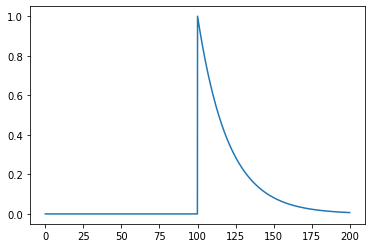

In [1]:
#https://www.western-neuralnets.ca/week3/lab3.html
from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
tau = 20*ms
eqs = '''
dx/dt = -x/tau : 1
'''

# create model
N = NeuronGroup( 1, eqs )

# initialize model
N.x = 0

# record model state
M = StateMonitor( N, 'x', record=True )


run(100*ms)

N.x = 1
run(100*ms)

plt.plot( M.t/ms, M.x[0] )


Text(0, 0.5, 'g_e (units of g_L)')

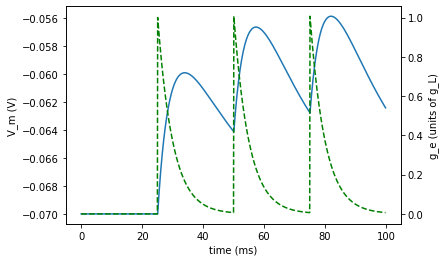

In [4]:
#https://www.western-neuralnets.ca/week3/lab3.html
#Simulation 1: LIF neuron with excitatory inputs

from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
taum   = 20*ms   # time constant
g_L    = 10*nS   # leak conductance
E_l    = -70*mV  # leak reversal potential
E_e    = 0*mV    # excitatory reversal potential
tau_e  = 5*ms    # excitatory synaptic time constant
Vr     = E_l     # reset potential
Vth    = -50*mV  # spike threshold
Vs     = 20*mV   # spiking potential
w_e    = 1       # excitatory synaptic weight (units of g_L)

# model equations
eqs = '''
dv/dt = ( E_l - v + g_e*(E_e-v) ) / taum  : volt (unless refractory)
dg_e/dt = -g_e/tau_e  : 1  # excitatory conductance (dimensionless units)
'''

# create neuron
N = NeuronGroup( 1, model=eqs, threshold='v>Vth', reset='v=Vr', refractory='5*ms', method='euler' )

# initialize neuron
N.v = E_l

# create inputs
indices = array([0, 0, 0]); times = array([25, 50, 75])*ms
input = SpikeGeneratorGroup( 1, indices, times )

# create connections
S = Synapses( input, N, 'w: 1', on_pre='g_e += w_e' )
S.connect( i=0, j=0 );

# record model state
M = StateMonitor( N, ('v','g_e'), record=True )

# run simulation
run( 100*ms )

# plot output
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
ax1.plot( M.t/ms, M.v[0] ); ax2.plot( M.t/ms, M.g_e[0], 'g--' );
ax1.set_xlabel( 'time (ms)' ); ax1.set_ylabel( 'V_m (V)' ); ax2.set_ylabel( 'g_e (units of g_L)' )


Text(0, 0.5, 'g_e (units of g_L)')

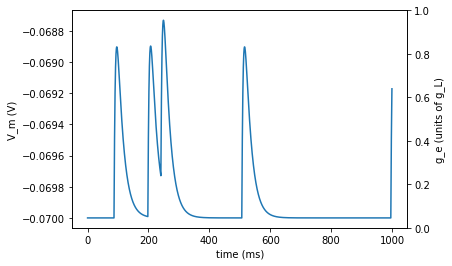

In [5]:
#https://www.western-neuralnets.ca/week3/lab3.html
#Simulation 2: LIF neuron with Poisson excitatory inputs

from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
taum   = 20*ms   # time constant
g_L    = 10*nS   # leak conductance
E_l    = -70*mV  # leak reversal potential
E_e    = 0*mV    # excitatory reversal potential
tau_e  = 5*ms    # excitatory synaptic time constant
Vr     = E_l     # reset potential
Vth    = -50*mV  # spike threshold
Vs     = 20*mV   # spiking potential
w_e    = 0.1  	 # excitatory synaptic weight (units of g_L)
v_e    = 5*Hz    # excitatory Poisson rate
N_e    = 100     # number of excitatory inputs

# model equations
eqs = '''
dv/dt = ( E_l - v + g_e*(E_e-v) ) / taum  : volt (unless refractory)
dg_e/dt = -g_e/tau_e  : 1  # excitatory conductance (dimensionless units)
'''

# create neuron
N = NeuronGroup( 1, model=eqs, threshold='v>Vth', reset='v=Vr', refractory='5*ms', method='euler' )

# initialize neuron
N.v = E_l

# create inputs
P = PoissonGroup( N_e, v_e )

# create connections
S = Synapses( P, N, 'w: 1', on_pre='g_e += w_e' )
S.connect( i=0, j=0 );

# record model state
M = StateMonitor( N, ('v','g_e'), record=True )

# run simulation
run( 1000*ms )

# plot output
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
ax1.plot( M.t/ms, M.v[0] );
ax1.set_xlabel( 'time (ms)' ); ax1.set_ylabel( 'V_m (V)' ); ax2.set_ylabel( 'g_e (units of g_L)' )

Text(0, 0.5, 'g_i (units of g_L)')

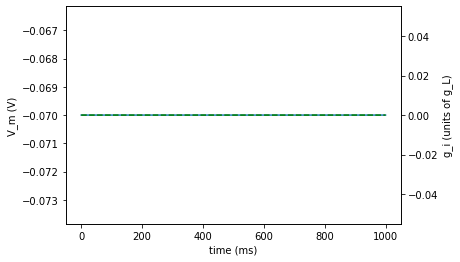

In [7]:
#https://www.western-neuralnets.ca/week3/lab3.html
#Simulation 3: LIF neuron with Poisson inhibitory inputs

from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
taum   = 20*ms   # time constant
g_L    = 10*nS   # leak conductance
E_l    = -70*mV  # leak reversal potential
E_i    = -80*mV  # inhibitory reversal potential
tau_i  = 10*ms   # inhibitory synaptic time constant
Vr     = E_l     # reset potential
Vth    = -50*mV   # spike threshold
Vs     = 20*mV   # spiking potential
w_i    = 0.1     # inhibitory synaptic weight
v_i    = 5*Hz    # inhibitory Poisson rate
N_i    = 100     # number of inhibitory inputs

# model equations
eqs = '''
dv/dt = ( E_l - v + g_i*(E_i-v) ) / taum  : volt (unless refractory)
dg_i/dt = -g_i/tau_i  : 1  # inhibitory conductance (dimensionless units)
'''

# create neuron
N = NeuronGroup( 1, model=eqs, threshold='v>Vth', reset='v=Vr', refractory='5*ms', method='euler' )

# initialize neuron
N.v = E_l

# create inputs
P = PoissonGroup( N_i, v_i )

# create connections
S = Synapses( P, N, 'w: 1', on_pre='g_i += w' )
S.connect( p=1 );

# record model state
M = StateMonitor( N, ('v','g_i'), record=True )

# run simulation
run( 1000*ms )

# plot output
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
ax1.plot( M.t/ms, M.v[0] ); ax2.plot( M.t/ms, M.g_i[0], 'g--' );
ax1.set_xlabel( 'time (ms)' ); ax1.set_ylabel( 'V_m (V)' ); ax2.set_ylabel( 'g_i (units of g_L)' )

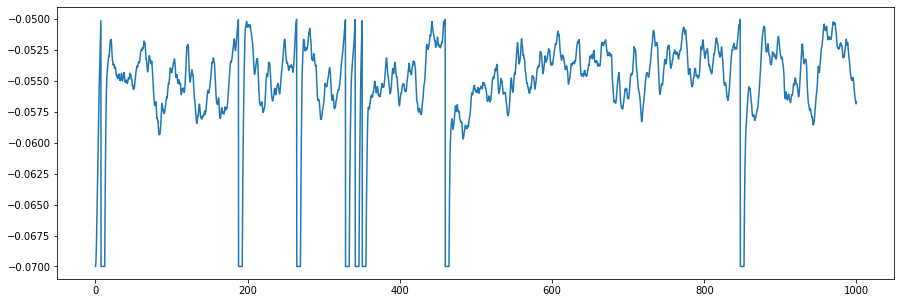

In [8]:
#https://www.western-neuralnets.ca/week3/lab3.html
#Simulation 4: LIF neuron with E/I Poisson inputs

from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
taum   = 20*ms          # time constant
g_L    = 10*nS          # leak conductance
E_l    = -70*mV         # leak reversal potential
E_e    = 0*mV           # excitatory reversal potential
tau_e  = 5*ms           # excitatory synaptic time constant
E_i    = -80*mV         # inhibitory reversal potential
tau_i  = 10*ms          # inhibitory synaptic time constant
Nin    = 1000	        # number of synaptic inputs
Ne     = int(0.8*Nin)   # number of excitatory inputs
Ni     = int(0.2*Nin)   # number of inhibitory inputs
Vr     = E_l            # reset potential
Vth    = -50*mV         # spike threshold
Vs     = 20*mV          # spiking potential

w_e    = 0.1              # excitatory synaptic weight
w_i    = 0.4              # inhibitory synaptic weight

ve     = 10*Hz          # excitatory input rate
vi     = 10*Hz          # inhibitory input rate

# model equations
eqs = '''
dv/dt = ( E_l - v + g_e*(E_e-v) + g_i*(E_i-v) ) / taum  : volt (unless refractory)
dg_e/dt = -g_e/tau_e  : 1  # excitatory conductance (dimensionless units)
dg_i/dt = -g_i/tau_i  : 1  # inhibitory conductance (dimensionless units)
'''

# create neuron
N = NeuronGroup( 1, model=eqs, threshold='v>Vth', reset='v=Vr', refractory='5*ms', method='euler' )

# initialize neuron
N.v = E_l

# create inputs
Pe = PoissonGroup( 1, (ve*Ne) ); Pi = PoissonGroup( 1, (vi*Ni) )

# create connections
synE = Synapses( Pe, N, 'w: 1', on_pre='g_e += w_e' ); synE.connect( p=1 ); 
synI = Synapses( Pi, N, 'w: 1', on_pre='g_i += w_i' ); synI.connect( p=1 ); 

# record model state
M = StateMonitor( N, ('v','g_i'), record=True )
S = SpikeMonitor( N )

# run simulation
run( 1000*ms )

# plot output
plt.figure(figsize=(15,5)); plt.plot( M.t/ms, M.v[0] );